In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%cd evaluation/runtime_performance

/Users/yasith/projects/streaminghub/evaluation/runtime_performance


In [2]:
df_ipc_stats = pd.read_csv("stats/run_ipc.csv")
df_rpc_avro_stats = pd.read_csv("stats/run_rpc_avro.csv")
df_rpc_json_stats = pd.read_csv("stats/run_rpc_json.csv")
df_rpc_msgpack_stats = pd.read_csv("stats/run_rpc_msgpack.csv")

In [3]:
df_stats = pd.concat([df_ipc_stats, df_rpc_avro_stats, df_rpc_json_stats, df_rpc_msgpack_stats], ignore_index=True)
df_stats = df_stats.melt(id_vars=["dataset_name", "runtime", "num_points", "run"], var_name="metric").sort_index()

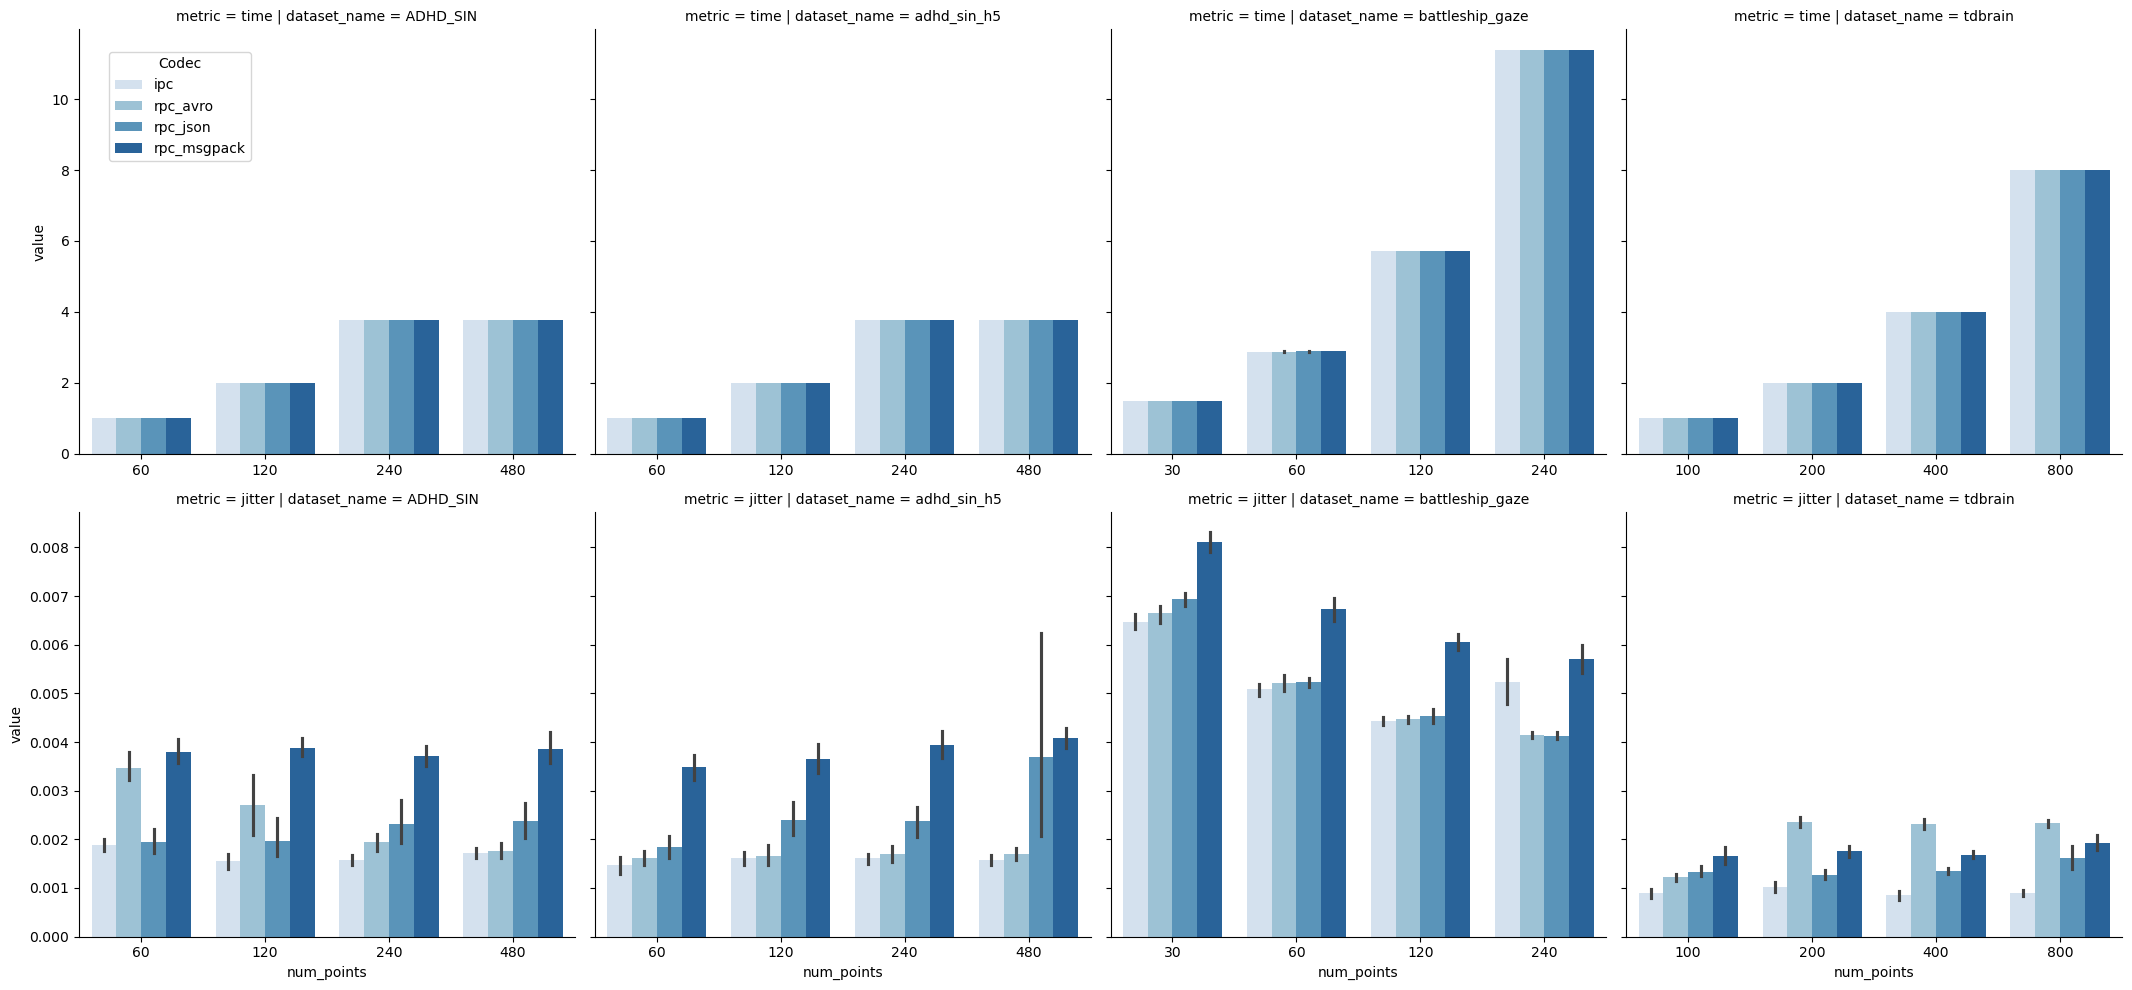

In [31]:
g = sns.catplot(
    df_stats,
    kind="bar",
    col="dataset_name",
    row="metric",
    x="num_points",
    y="value",
    hue="runtime",
    palette="Blues",
    sharey="row",
    sharex=False,
)
sns.move_legend(g, "upper left", bbox_to_anchor=(.05, .95), title="Codec", frameon=True)
plt.tight_layout()
plt.savefig("figures/stats.pdf")
plt.show()